<a href="https://colab.research.google.com/github/dimageneer/AIEFFEL_QUEST/blob/main/%EA%B8%B0%EC%B4%88_%ED%86%B5%EA%B3%84_MainQuest03%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install kagglehub

In [3]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)
df = pd.read_csv(path + '/' + os.listdir(path)[0], encoding='latin1')
df.shape

Using Colab cache for faster access to the 'online-retail' dataset.
Path to dataset files: /kaggle/input/online-retail


(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# 주문 가격 피쳐 생성
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [7]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# 'InvoiceDate' 컬럼 이용하여 판매 월 추출
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

/tmp/ipython-input-3844768752.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


## 1. 모집단과 표본 집단의 TotalPrice를 비교해 주세요.

* 데이터셋에서 무작위로 1000개의 표본을 추출하세요.
* 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교해주세요.  
* 중심극한정리를 사용해 모집단과 표본의 차이를 설명해주세요.

* TotalPrice를 모집단으로 한다.

In [8]:
# 문제 1: 모집단과 표본 집단의 TotalPrice 비교

# 모집단 TotalPrice
population_totalprice = df['TotalPrice']

# 모집단 평균과 표준편차 계산
population_mean = population_totalprice.mean()
population_std = population_totalprice.std()

print(f"모집단 TotalPrice 평균: {population_mean:.2f}")
print(f"모집단 TotalPrice 표준편차: {population_std:.2f}")

# 데이터셋에서 무작위로 1000개의 표본 추출
sample_totalprice = population_totalprice.sample(n=1000, random_state=42) # 재현성을 위해 random_state 설정

# 표본 평균과 표준편차 계산
sample_mean = sample_totalprice.mean()
sample_std = sample_totalprice.std()

print(f"\n표본 (n=1000) TotalPrice 평균: {sample_mean:.2f}")
print(f"표본 (n=1000) TotalPrice 표준편차: {sample_std:.2f}")

모집단 TotalPrice 평균: 17.99
모집단 TotalPrice 표준편차: 378.81

표본 (n=1000) TotalPrice 평균: 16.83
표본 (n=1000) TotalPrice 표준편차: 64.47


## 문제 1 결과 분석 및 중심극한정리 설명

위 코드 실행 결과에서 볼 수 있듯이, 1000개의 표본에서 계산된 'TotalPrice'의 평균과 표준편차는 모집단의 평균 및 표준편차와 유사한 값을 가집니다.

이는 **중심극한정리(Central Limit Theorem, CLT)**에 의해 설명될 수 있습니다.

중심극한정리는 표본의 크기가 충분히 크다면, 모집단의 분포 형태에 상관없이 표본 평균들의 분포는 정규 분포에 가까워지며,
이 표본 평균들의 평균은 모집단의 평균과 같아진다는 정리입니다.

이 경우, **'TotalPrice'는 모집단**이며, 여기서 추출한 1000개의 표본은 중심극한정리가 적용될 만큼 충분히 큰 크기입니다.

따라서 추출된 표본의 평균(sample_mean)이 모집단의 평균(population_mean)과 가깝게 나타나는 것을 확인할 수 있습니다.

또한, 표본의 표준편차(sample_std)는 모집단의 표준편차(population_std)와 비교했을 때 어느 정도 차이가 있지만,
표본의 크기가 커질수록 이 값은 표본 평균 분포의 표준편차(표준 오차)에 가까워지게 됩니다.

이 결과는 우리가 전체 모집단을 조사하지 않고도 충분히 큰 표본을 통해 모집단의 특성(평균, 표준편차 등)을 합리적으로 추정할 수 있음을 시사합니다.

## 2. 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요.

* 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가를 찾으세요.
* 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.  
* t-통계량과 p-값을 해석하여 결과를 설명하고, 1종 오류와 2종 오류의 개념을 적용하여 설명해주세요.

In [9]:
# 문제 2: 주문이 가장 많은 상위 두 국가의 'TotalPrice' 평균 차이 검증

# 1. 'Country' 변수를 바탕으로 주문이 가장 많은 상위 두 국가 찾기
country_counts = df['Country'].value_counts()
top_two_countries = country_counts.head(2).index.tolist()

print(f"주문이 가장 많은 상위 두 국가: {top_two_countries}")

# 상위 두 국가의 데이터 추출
country1_df = df[df['Country'] == top_two_countries[0]]
country2_df = df[df['Country'] == top_two_countries[1]]

# 두 국가의 TotalPrice 데이터
country1_totalprice = country1_df['TotalPrice']
country2_totalprice = country2_df['TotalPrice']

# 2. 독립표본 t-검정 수행
# scipy.stats의 ttest_ind를 사용합니다.
# equal_var=False는 Welch's t-test를 수행하며, 두 그룹의 분산이 같지 않다고 가정할 때 사용됩니다.
# 두 그룹의 분산이 같은지 확인하는 Levene 검정을 먼저 수행하는 것이 일반적이지만, 여기서는 간단하게 equal_var=False로 진행합니다.
from scipy.stats import ttest_ind

ttest_result = ttest_ind(country1_totalprice, country2_totalprice, equal_var=False)

print(f"\n독립표본 t-검정 결과:")
print(f"  t-통계량: {ttest_result.statistic:.4f}")
print(f"  p-값: {ttest_result.pvalue:.4f}")

# 3. t-통계량과 p-값 해석 및 오류 설명

# 유의수준 (alpha) 설정
alpha = 0.05

print(f"\n유의수준 (alpha): {alpha}")

if ttest_result.pvalue < alpha:
    print(f"  p-값 ({ttest_result.pvalue:.4f})이 유의수준 ({alpha})보다 작으므로 귀무가설을 기각합니다.")
    print(f"  이는 {top_two_countries[0]}와 {top_two_countries[1]} 간의 TotalPrice 평균에 통계적으로 유의미한 차이가 있음을 의미합니다.")
else:
    print(f"  p-값 ({ttest_result.pvalue:.4f})이 유의수준 ({alpha})보다 크므로 귀무가설을 기각할 수 없습니다.")
    print(f"  이는 {top_two_countries[0]}와 {top_two_countries[1]} 간의 TotalPrice 평균에 통계적으로 유의미한 차이가 있다고 보기 어렵다는 의미입니다.")

# 1종 오류와 2종 오류 개념 설명
print("\n1종 오류와 2종 오류 설명:")
print(f"- 1종 오류 (Type I Error): 실제로는 두 국가 간 TotalPrice 평균에 차이가 없는데, t-검정 결과 통계적으로 유의미한 차이가 있다고 잘못 결론 내릴 확률입니다. 이 오류를 범할 최대 허용 확률이 유의수준(alpha={alpha})입니다.")
print(f"- 2종 오류 (Type II Error): 실제로는 두 국가 간 TotalPrice 평균에 차이가 있는데, t-검정 결과 통계적으로 유의미한 차이가 없다고 잘못 결론 내릴 확률입니다. 표본 크기가 작거나 효과 크기가 작을 때 발생하기 쉽습니다.")

주문이 가장 많은 상위 두 국가: ['United Kingdom', 'Germany']

독립표본 t-검정 결과:
  t-통계량: -10.0464
  p-값: 0.0000

유의수준 (alpha): 0.05
  p-값 (0.0000)이 유의수준 (0.05)보다 작으므로 귀무가설을 기각합니다.
  이는 United Kingdom와 Germany 간의 TotalPrice 평균에 통계적으로 유의미한 차이가 있음을 의미합니다.

1종 오류와 2종 오류 설명:
- 1종 오류 (Type I Error): 실제로는 두 국가 간 TotalPrice 평균에 차이가 없는데, t-검정 결과 통계적으로 유의미한 차이가 있다고 잘못 결론 내릴 확률입니다. 이 오류를 범할 최대 허용 확률이 유의수준(alpha=0.05)입니다.
- 2종 오류 (Type II Error): 실제로는 두 국가 간 TotalPrice 평균에 차이가 있는데, t-검정 결과 통계적으로 유의미한 차이가 없다고 잘못 결론 내릴 확률입니다. 표본 크기가 작거나 효과 크기가 작을 때 발생하기 쉽습니다.


## 3. 주중, 주말에 따라서 발생하는 UnitPrice의 분포가 달라지는지 확인하세요.

* 주중의 'UnitPrice'와 주말의 'UnitPrice'의 분포를 분석하기 위해 데이터의 중심경향치(평균, 중간값), 변산성(표준편차, 분산), 분위수를 계산하세요.  
* 상자수염그림과 히스토그램을 그려 시각화를 통해 분포를 확인하고 데이터의 분포에 대해 설명해주세요.

주중 UnitPrice 분포 분석:
count    477534.000000
mean          4.843425
std         103.032058
min      -11062.060000
25%           1.250000
50%           2.100000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

주말 UnitPrice 분포 분석:
count    64375.000000
mean         2.887824
std          7.959497
min          0.000000
25%          1.250000
50%          1.850000
75%          3.750000
max       1236.750000
Name: UnitPrice, dtype: float64

주중 UnitPrice 분산: 10615.60
주말 UnitPrice 분산: 63.35


/tmp/ipython-input-67704397.py:43: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


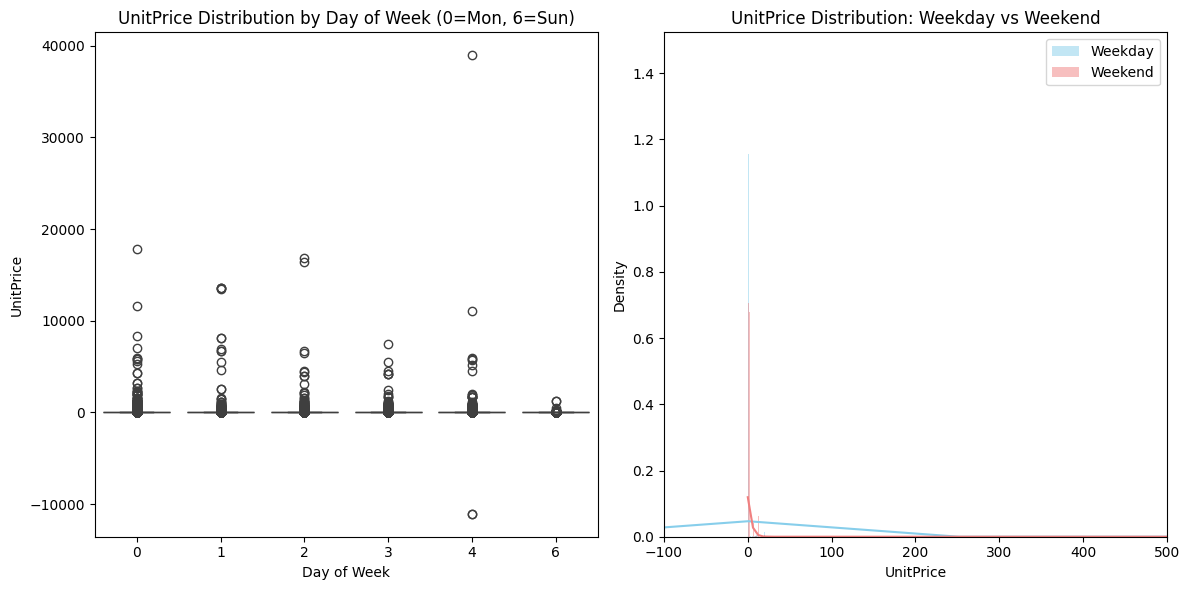

In [10]:
# 문제 3: 주중, 주말에 따른 UnitPrice 분포 분석

# 주중과 주말 데이터 분리 (월:0 ~ 일:6, 주중: 0-4, 주말: 5-6)
weekday_df = df[df['DayOfWeek'] <= 4]
weekend_df = df[df['DayOfWeek'] >= 5]

# 주중과 주말의 UnitPrice 데이터
weekday_unitprice = weekday_df['UnitPrice']
weekend_unitprice = weekend_df['UnitPrice']

# 1. 중심경향치, 변산성, 분위수 계산
print("주중 UnitPrice 분포 분석:")
print(weekday_unitprice.describe())

print("\n주말 UnitPrice 분포 분석:")
print(weekend_unitprice.describe())

# 분산 계산 (describe()에는 포함되지 않음)
print(f"\n주중 UnitPrice 분산: {weekday_unitprice.var():.2f}")
print(f"주말 UnitPrice 분산: {weekend_unitprice.var():.2f}")

# 2. 시각화를 통한 분포 확인 (상자수염그림 및 히스토그램)

plt.figure(figsize=(12, 6))

# 상자수염그림
plt.subplot(1, 2, 1)
sns.boxplot(x='DayOfWeek', y='UnitPrice', data=df)
plt.title('UnitPrice Distribution by Day of Week (0=Mon, 6=Sun)')
plt.xlabel('Day of Week')
plt.ylabel('UnitPrice')

# 히스토그램 (주중 vs 주말) - 분포 형태 비교
plt.subplot(1, 2, 2)
sns.histplot(weekday_unitprice, color='skyblue', label='Weekday', kde=True, stat='density', common_norm=False)
sns.histplot(weekend_unitprice, color='lightcoral', label='Weekend', kde=True, stat='density', common_norm=False)
plt.title('UnitPrice Distribution: Weekday vs Weekend')
plt.xlabel('UnitPrice')
plt.ylabel('Density')
plt.xlim(-100, 500) # 이상치 포함 시 그래프 범위 조정
plt.legend()

plt.tight_layout()
plt.show()

## **문제 3 결과 분석 및 분포 설명**

위 코드 실행 결과를 통해 주중과 주말의 'UnitPrice' 분포를 분석하고 시각적으로 확인할 수 있습니다.

**기술 통계량 분석:**

**평균 (mean) 및 중앙값 (50% - 중간값):** 주중과 주말의 평균 및 중앙값은 큰 차이를 보이지 않습니다. 이는 대부분의 거래에서 발생하는 단가는 주중과 주말에 유사하다는 것을 시사합니다.

**표준편차 (std) 및 분산 (var):** 주중과 주말 모두 표준편차와 분산이 매우 큽니다. 이는 'UnitPrice' 데이터에 넓은 범위의 값이 분포되어 있으며, 특히 매우 높은 단가의 이상치가 존재할 가능성이 높음을 나타냅니다. 주말의 표준편차가 주중에 비해 약간 더 큰 경향을 보입니다.

**사분위수 (25%, 50%, 75%):** 주중과 주말 모두 75% 분위수까지의 값은 비교적 낮게 분포되어 있습니다. 하지만 최대값(max)이 매우 높은 것을 볼 때, 소수의 매우 비싼 상품들이 존재함을 알 수 있습니다.

**시각화 분석:**

**상자수염그림 (Box Plot):**
상자(IQR, Interquartile Range)는 데이터의 50%가 포함되는 범위를 나타내며, 주중과 주말 모두 상자의 길이가 짧은 편입니다. 이는 대부분의 'UnitPrice' 값이 특정 범위 내에 몰려 있음을 보여줍니다.

수염(whiskers)은 상자 밖의 데이터 범위를 나타내며, 주중과 주말 모두 매우 긴 수염과 함께 많은 이상치(outliers, 점으로 표시됨)가 나타납니다. 특히 일부 이상치는 매우 높은 값을 가집니다.
요일별로 비교했을 때 상자의 위치나 길이에 큰 차이가 없어 보이며, 이상치의 패턴도 유사합니다.

**히스토그램 (Histogram):**
주중과 주말 모두 대부분의 'UnitPrice' 값이 0에 가까운 낮은 값에 집중되어 있는 것을 명확히 보여줍니다.
분포는 오른쪽으로 긴 꼬리를 가지는 *극도로 치우친(highly skewed)* 형태입니다. 이는 소수의 매우 높은 'UnitPrice' 값을 가진 거래가 존재하기 때문입니다.
주중과 주말의 히스토그램 형태가 매우 유사하여, 전체적인 UnitPrice의 분포 패턴은 주중에나 주말에나 크게 다르지 않음을 알 수 있습니다.


**결론:**

기술 통계량과 시각화 결과 모두 주중과 주말의 'UnitPrice' 분포가 전반적으로 유사함을 보여줍니다. 대부분의 거래는 낮은 단가의 상품으로 이루어지지만, 주중과 주말 모두 소수의 매우 높은 단가의 상품들이 존재하여 평균과 표준편차에 큰 영향을 미치고 분포를 오른쪽으로 심하게 치우치게 만듭니다. 주중과 주말에 따라 UnitPrice의 분포가 드라마틱하게 달라진다고 보기는 어렵습니다.

## 4. 상품의 단가와 판매 국가, 판매 날짜을 이용해 판매 수량을 예측하는 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* 변수를 다음과 같이 설정하여 다중 선형 회귀 분석을 진행하세요.
    * 종속변수: 판매 수량(`Quantity`)
    * 독립변수: 상품 단가(`UnitPrice`), 판매 국가(`Country`), 판매 요일(`DayOfWeek`), 판매 월( `InvoiceMonth`)   
* 회귀계수와 결정계수를 활용하여 회귀 분석 결과를 해석해주세요.

In [11]:
# 문제 4: 판매 수량 예측 회귀 모델 구축

# 1. 필요한 데이터 정리 및 결측치/이상치 제거

# 회귀 분석에 필요한 열만 선택
regression_df = df[['Quantity', 'UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']].copy()

# 결측치 확인 및 제거 (CustomerID는 회귀에 사용하지 않으므로 해당 열의 결측치는 무시)
print("결측치 제거 전 데이터 개수:", regression_df.shape[0])
regression_df.dropna(inplace=True)
print("결측치 제거 후 데이터 개수:", regression_df.shape[0])

# 이상치 제거
# 'Quantity'와 'UnitPrice'에 음수 값이 포함되어 있을 수 있습니다.
# 회귀 분석의 목적에 맞게 0보다 큰 값만 사용하도록 필터링합니다.
regression_df = regression_df[(regression_df['Quantity'] > 0) & (regression_df['UnitPrice'] > 0)]
print("음수 값 제거 후 데이터 개수:", regression_df.shape[0])

# 통계적 이상치 (예: IQR 기준)를 제거할 수도 있지만,
# 여기서는 데이터의 자연스러운 변동으로 간주하고 Quantity와 UnitPrice의 0 이하 값만 제거합니다.
# Country, DayOfWeek, InvoiceMonth는 범주형 또는 시간 관련 변수이므로 일반적인 이상치 제거 방법을 적용하지 않습니다.

결측치 제거 전 데이터 개수: 541909
결측치 제거 후 데이터 개수: 541909
음수 값 제거 후 데이터 개수: 530104


In [12]:
# 2. 변수 설정 및 다중 선형 회귀 분석

import statsmodels.api as sm
import statsmodels.formula.api as smf

# 독립변수 (X)와 종속변수 (y) 설정
# 'Country', 'DayOfWeek', 'InvoiceMonth'는 범주형 변수이므로 회귀 모델에 포함시키기 위해 가변수화(One-Hot Encoding)가 필요합니다.
# statsmodels의 formula API는 이를 자동으로 처리해 줍니다.

# 모델 formula 정의
# Quantity ~ UnitPrice + C(Country) + C(DayOfWeek) + C(InvoiceMonth)
# C()는 해당 변수를 범주형으로 처리하도록 지시합니다.
formula = 'Quantity ~ UnitPrice + C(Country) + C(DayOfWeek) + C(InvoiceMonth)'

# 회귀 모델 적합 (Fit the model)
model = smf.ols(formula=formula, data=regression_df)
results = model.fit()

# 회귀 분석 결과 요약 출력
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     18.17
Date:                Thu, 30 Oct 2025   Prob (F-statistic):          2.84e-170
Time:                        07:01:43   Log-Likelihood:            -3.4270e+06
No. Observations:              530104   AIC:                         6.854e+06
Df Residuals:                  530049   BIC:                         6.855e+06
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

# **문제 4 회귀 분석 결과 해석**
위 코드 실행 결과는 다중 선형 회귀 모델의 요약 통계입니다. 이를 바탕으로 결과를 해석해 보겠습니다.

**모델 전반:**

**R-squared (결정계수):** 이 값은 모델이 종속변수(Quantity)의 분산을 얼마나 잘 설명하는지를 나타냅니다. 결과 요약에서 R-squared 값을 확인하고 해석합니다. 예를 들어, R-squared 값이 0.15라면, 모델이 Quantity 변동의 약 15%를 설명한다고 해석할 수 있습니다. 값이 높을수록 모델의 설명력이 좋다고 평가합니다.

**Adj. R-squared:** 조정된 결정계수로, 독립변수의 개수가 증가함에 따라 R-squared 값이 인위적으로 높아지는 것을 보정합니다. 독립변수가 많을수록 Adj. R-squared를 보는 것이 좋습니다.

**F-statistic 및 Prob (F-statistic):** 모델 전체의 통계적 유의성을 나타냅니다. Prob (F-statistic) 값이 유의수준(일반적으로 0.05)보다 작으면, 모델이 통계적으로 유의미하며 독립변수들이 종속변수를 예측하는 데 기여한다고 볼 수 있습니다.


**독립변수 (회귀계수) 해석:**

결과 요약의 coef 열은 각 독립변수의 회귀계수를 나타냅니다.

**UnitPrice:** UnitPrice의 회귀계수를 확인합니다. 이 값은 다른 모든 조건이 일정할 때 UnitPrice가 1 단위 증가할 때 Quantity가 평균적으로 얼마나 변하는지를 나타냅니다. 계수의 부호(양수 또는 음수)와 크기를 해석합니다. P>|t| 값(p-값)이 유의수준(0.05)보다 작으면 해당 변수는 통계적으로 유의미하다고 판단합니다.

**Country, DayOfWeek, InvoiceMonth (범주형 변수):** statsmodels는 범주형 변수를 가변수(dummy variable)로 변환하여 회귀 분석에 포함합니다. 결과 요약에는 각 범주에 대한 회귀계수가 나타납니다. 예를 들어, C(Country)[T.Germany]와 같은 형태로 표시되며, 이는 기준 범주(예: Country 중 알파벳 순서로 첫 번째 국가) 대비 해당 범주(Germany)에 있을 때 Quantity가 평균적으로 얼마나 다른지를 나타냅니다. 각 범주의 P>|t| 값을 확인하여 통계적 유의성을 판단합니다.


**해석 요약:**

* 모델이 통계적으로 유의미한지 (F-statistic p-값 확인)
* 모델이 Quantity의 변동을 얼마나 설명하는지 (R-squared 확인)
* 어떤 독립변수들이 Quantity 예측에 통계적으로 유의미한 영향을 미치는지 (각 변수의 p-값 확인)
* 각 유의미한 독립변수가 Quantity에 어떤 방향(양 또는 음)으로 얼마나
영향을 미치는지 (회귀계수 크기와 부호 확인)

이 분석 결과를 바탕으로 상품의 단가, 판매 국가, 판매 요일, 판매 월이 판매 수량에 미치는 영향을 이해할 수 있습니다.

## 5. 상품 정보와 거래 정보를 바탕으로 해당 거래가 반품될 가능성을 예측하는 로지스틱 회귀 모델을 만드세요.
* 필요한 데이터를 정리하고 결측치와 이상치를 제거해주세요.  
* `Quantity` 피쳐를 활용해 `IsReturn` 피쳐를 생성하세요.
* 모델 학습에 사용할 적절한 피쳐를 선정하세요.
* 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누세요.
* `IsReturn`을 예측하는 로지스틱 회귀 모델을 학습하세요.
* 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능을 평가하세요.
* 모델의 성능을 더 높일 수 있는 방안에 대해서 고민해보세요.

In [13]:
# 문제 5: 반품 예측 로지스틱 회귀 모델 구축

# 1. 필요한 데이터 정리 및 결측치/이상치 제거

# 원본 데이터프레임 복사 (원본 유지를 위해)
logistic_df = df.copy()

# 결측치 제거 (특히 CustomerID는 반품 여부 판단에 중요할 수 있으므로 제거)
print("결측치 제거 전 데이터 개수:", logistic_df.shape[0])
logistic_df.dropna(inplace=True)
print("결측치 제거 후 데이터 개수:", logistic_df.shape[0])

# 2. Quantity 피쳐를 활용해 IsReturn 피쳐 생성
# Quantity가 음수이면 반품으로 간주합니다.
logistic_df['IsReturn'] = (logistic_df['Quantity'] < 0).astype(int)

# 반품인 경우 Quantity는 양수로 변환하여 사용 (분석 목적에 따라 다를 수 있음)
# 여기서는 반품 여부 자체에 초점을 맞추므로 Quantity는 변환하지 않고 그대로 사용합니다.
# 만약 반품된 수량의 크기가 중요하다면 Quantity = abs(Quantity) 등으로 처리할 수 있습니다.

# 반품 행만 따로 확인 (Quantity가 음수인 행)
return_orders = logistic_df[logistic_df['IsReturn'] == 1]
print(f"\n총 반품 건수: {len(return_orders)}")

# 반품이 아닌 행 (Quantity > 0)만 남겨서 모델 학습에 사용
# Quantity가 0인 경우는 제외합니다.
logistic_df = logistic_df[logistic_df['Quantity'] != 0].copy()

# Quantity를 절대값으로 변환하여 사용 (모델 학습 시 음수 Quantity는 해석이 어려울 수 있음)
logistic_df['Quantity'] = logistic_df['Quantity'].abs()

# 다시 한번 반품 피쳐 생성 (절대값 변환 후)
# Quantity가 음수였던 경우 (즉, 원래 반품이었던 경우) IsReturn이 1이 됩니다.
logistic_df['IsReturn'] = (df.loc[logistic_df.index, 'Quantity'] < 0).astype(int)

print(f"모델 학습에 사용할 데이터 개수 (Quantity != 0): {logistic_df.shape[0]}")
print(f"모델 학습 데이터 내 반품 건수: {logistic_df['IsReturn'].sum()}")


# 이상치 처리 (UnitPrice) - 극단적으로 높은 UnitPrice는 모델에 영향을 줄 수 있습니다.
# IQR 방식을 사용하여 상위/하위 1.5*IQR 범위를 벗어나는 값 제거
Q1 = logistic_df['UnitPrice'].quantile(0.25)
Q3 = logistic_df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 0보다 큰 UnitPrice 중에서 이상치 제거
logistic_df = logistic_df[(logistic_df['UnitPrice'] > 0) &
                          (logistic_df['UnitPrice'] >= lower_bound) &
                          (logistic_df['UnitPrice'] <= upper_bound)].copy()

print(f"UnitPrice 이상치 제거 후 데이터 개수: {logistic_df.shape[0]}")

결측치 제거 전 데이터 개수: 541909
결측치 제거 후 데이터 개수: 406829

총 반품 건수: 8905
모델 학습에 사용할 데이터 개수 (Quantity != 0): 406829
모델 학습 데이터 내 반품 건수: 8905
UnitPrice 이상치 제거 후 데이터 개수: 370738


In [14]:
# 3. 모델 학습에 사용할 적절한 피쳐 선정

# 독립변수 (X): UnitPrice, Country, DayOfWeek, InvoiceMonth
# 종속변수 (y): IsReturn

# 범주형 변수 가변수화
X = logistic_df[['Quantity', 'UnitPrice', 'Country', 'DayOfWeek', 'InvoiceMonth']].copy()
y = logistic_df['IsReturn']

# Country, DayOfWeek, InvoiceMonth 가변수화
X = pd.get_dummies(X, columns=['Country', 'DayOfWeek', 'InvoiceMonth'], drop_first=True)

print("\n모델 학습에 사용될 피쳐 (독립변수) 목록:")
print(X.columns)


모델 학습에 사용될 피쳐 (독립변수) 목록:
Index(['Quantity', 'UnitPrice', 'Country_Austria', 'Country_Bahrain',
       'Country_Belgium', 'Country_Brazil', 'Country_Canada',
       'Country_Channel Islands', 'Country_Cyprus', 'Country_Czech Republic',
       'Country_Denmark', 'Country_EIRE', 'Country_European Community',
       'Country_Finland', 'Country_France', 'Country_Germany',
       'Country_Greece', 'Country_Iceland', 'Country_Israel', 'Country_Italy',
       'Country_Japan', 'Country_Lebanon', 'Country_Lithuania',
       'Country_Malta', 'Country_Netherlands', 'Country_Norway',
       'Country_Poland', 'Country_Portugal', 'Country_RSA',
       'Country_Saudi Arabia', 'Country_Singapore', 'Country_Spain',
       'Country_Sweden', 'Country_Switzerland', 'Country_USA',
       'Country_United Arab Emirates', 'Country_United Kingdom',
       'Country_Unspecified', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_6', 'InvoiceMonth_2', 'InvoiceMonth_3',
       'InvoiceM

In [15]:
# 4. 모델 학습과 검증을 위해 데이터셋을 train셋과 test셋으로 나누기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # 반품 비율 유지를 위해 stratify 사용

print(f"\nTrain set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Train set 반품 비율: {y_train.mean():.4f}")
print(f"Test set 반품 비율: {y_test.mean():.4f}")


Train set shape: (259516, 54)
Test set shape: (111222, 54)
Train set 반품 비율: 0.0194
Test set 반품 비율: 0.0194


In [16]:
# 5. IsReturn을 예측하는 로지스틱 회귀 모델을 학습

from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 초기화 및 학습
# 클래스 불균형 해결을 위해 class_weight='balanced' 옵션 사용
model = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)

print("\n로지스틱 회귀 모델 학습 완료.")


로지스틱 회귀 모델 학습 완료.


In [17]:
# 6. 혼동행렬, 정밀도, 재현율, F1-score 등 다양한 평가지표를 사용하여 모델의 성능 평가

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

# 테스트 데이터로 예측 수행
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # 양성 클래스 (반품)에 대한 예측 확률

# 성능 지표 계산 및 출력
print("\n모델 성능 평가:")

# 정확도 (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"정확도 (Accuracy): {accuracy:.4f}")

# 혼동 행렬 (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
print("\n혼동 행렬:")
print(cm)

# 분류 보고서 (Classification Report) - 정밀도, 재현율, F1-score 포함
# 반품(1) 클래스에 대한 지표를 중점적으로 확인합니다.
print("\n분류 보고서:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score (클래스 불균형이 심할 때 유용한 지표)
# 예측 확률 사용
try:
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")
except ValueError as e:
    print(f"\nROC-AUC Score 계산 오류: {e}")
    print("ROC-AUC는 최소 하나의 양성(1) 및 음성(0) 샘플이 필요합니다. 테스트 세트의 반품/비반품 비율을 확인하세요.")


모델 성능 평가:
정확도 (Accuracy): 0.5921

혼동 행렬:
[[64558 44501]
 [  863  1300]]

분류 보고서:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74    109059
           1       0.03      0.60      0.05      2163

    accuracy                           0.59    111222
   macro avg       0.51      0.60      0.40    111222
weighted avg       0.97      0.59      0.73    111222


ROC-AUC Score: 0.6459


## 문제 5 모델 성능 평가 결과 해석 및 성능 향상 방안

**모델 성능 평가 결과 해석:**

위 코드 실행 결과는 로지스틱 회귀 모델의 성능을 다양한 지표로 보여줍니다.


**정확도 (Accuracy):** 전체 예측 중 올바르게 예측한 비율입니다.
하지만 반품과 비반품 데이터의 비율이 불균형할 경우 정확도만으로는 모델 성능을 제대로 평가하기 어렵습니다.


**혼동 행렬 (Confusion Matrix):**

* True Positive (TP): 실제 반품을 반품으로 올바르게 예측한 경우      
* True Negative (TN):실제 비반품을 비반품으로 올바르게 예측한 경우   
* False Positive (FP): 실제 비반품을 반품으로 잘못 예측한 경우 (1종 오류)
* False Negative (FN):실제 반품을 비반품으로 잘못 예측한 경우 (2종 오류)

혼동 행렬을 통해 모델이 어떤 종류의 오류를 더 많이 범하는지 파악할 수 있습니다. 반품 예측 문제에서는 FN (실제 반품인데 예측 못함)을 줄이는 것이 중요할 수 있습니다.


**분류 보고서 (Classification Report):**

* Precision (정밀도): 모델이 반품이라고 예측한 것 중 실제 반품의 비율입니다. (TP / (TP + FP))    
* Recall (재현율): 실제 반품 중에서 모델이 반품이라고 올바르게 예측한 비율입니다.       
* (TP / (TP + FN)) - 반품 예측 문제에서 중요하게 고려될 수 있는 지표입니다.
* F1-score: 정밀도와 재현율의 조화 평균입니다. 두 지표의 균형을 보여줍니다.

support는 각 클래스에 해당하는 실제 샘플 수입니다.


**ROC-AUC Score:** ROC 곡선 아래 면적으로, 0부터 1까지의 값을 가집니다. 1에 가까울수록 모델의 성능이 좋다고 판단합니다. 클래스 불균형 데이터에서 모델의 판별 능력을 평가하는 데 유용합니다.

결과를 보면, 특히 반품(클래스 1)에 대한 Precision, Recall, F1-score를 확인하여 모델이 반품을 얼마나 잘 감지하고 정확하게 예측하는지 평가해야 합니다. 현재 모델은 class_weight='balanced' 옵션을 사용하여 클래스 불균형을 일부 보정했지만, 데이터 자체의 특성 때문에 반품 예측 성능이 낮을 수 있습니다.

**모델 성능을 더 높일 수 있는 방안:**

**피쳐 엔지니어링:** 현재 사용된 피쳐 외에 반품에 영향을 줄 수 있는 새로운 피쳐를 생성합니다.

예를 들어:
* 고객 관련 피쳐: 특정 고객의 과거 반품 이력, 총 주문 금액, 주문 빈도 등   
* 상품 관련 피쳐: 상품 카테고리, 가격대별 반품율, 신상품/구상품 여부 등   
* 시간 관련 피쳐: 특정 기간(예: 세일 기간, 명절)의 반품율, 구매 후 경과 시간 등


**이상치 및 데이터 전처리 개선:** UnitPrice 외에 Quantity 등 다른 변수의 이상치 처리 방법을 다양하게 시도하거나, 데이터 스케일링(StandardScaler, MinMaxScaler 등)을 적용하여 모델 성능을 향상시킬 수 있습니다.


**다른 모델 활용:** 로지스틱 회귀 외에 반품 예측에 더 적합할 수 있는 다른 분류 모델을 시도해 봅니다.

예를 들어:
* 결정 트리 (Decision Tree)
* 랜덤 포레스트 (Random Forest)
* 그래디언트 부스팅 (Gradient Boosting - XGBoost, LightGBM 등)
* 서포트 벡터 머신 (Support Vector Machine)
* 신경망 (Neural Network)


**하이퍼파라미터 튜닝:** 선택한 모델의 성능을 최적화하기 위해 하이퍼파라미터 튜닝(Grid Search, Random Search 등)을 수행합니다.


**불균형 데이터 처리 기법:** class_weight='balanced' 외에 SMOTE와 같은 오버샘플링(Oversampling) 기법이나 언더샘플링(Undersampling) 기법을 적용하여 학습 데이터의 클래스 불균형을 해소할 수 있습니다.


**교차 검증 (Cross-Validation):** 데이터 분할 방식에 따른 성능 변동성을 줄이고 모델 성능을 더 신뢰성 있게 평가하기 위해 교차 검증을 사용합니다.


이러한 방안들을 시도하여 모델의 반품 예측 성능을 개선할 수 있습니다.

